# Principal Component Analysis (PCA)

## Introduction

Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in data analysis and machine learning. It helps in simplifying complex datasets by transforming them into a new set of orthogonal variables, known as principal components. PCA is valuable for visualization, noise reduction, and feature extraction.

## PCA Algorithm

PCA operates as follows:

- **Step 1: Standardization**: Standardize the dataset to have zero mean and unit variance for each feature.

- **Step 2: Covariance Matrix**: Calculate the covariance matrix of the standardized data.

- **Step 3: Eigenvalue and Eigenvector Computation**: Compute the eigenvalues and eigenvectors of the covariance matrix.

- **Step 4: Sort and Select Components**: Sort the eigenvalues in descending order and select the top k eigenvectors corresponding to the largest eigenvalues, where k is the desired number of principal components.

- **Step 5: Projection**: Project the data onto the selected principal components to obtain a reduced-dimensional representation of the dataset.

## Advantages and Disadvantages

### Advantages

- **Dimensionality Reduction**: PCA helps in reducing the dimensionality of the dataset while preserving most of the variance.

- **Noise Reduction**: It can remove noise and irrelevant information from the data.

- **Visualization**: PCA enables visualization of high-dimensional data in a lower-dimensional space.

- **Feature Extraction**: It can extract meaningful features or components from the data.

### Disadvantages

- **Linearity Assumption**: PCA assumes linear relationships between variables and may not perform well for nonlinear data.

- **Interpretability**: Interpretation of principal components may not always be straightforward.

- **Loss of Information**: Reducing dimensions can result in some loss of information.




## Illustration

- The original data, which had 3 features (or dimensions), is transformed into 2 dimensions using PCA.
- The scatter plot shows the data points in the reduced 2-dimensional space.
- Each point in the plot represents a data sample, now described by two principal components.
- These principal components are the directions in the data that maximize variance, effectively capturing the most important features of the data in fewer dimensions.
- This visualization demonstrates how PCA reduces the dimensionality of the data while retaining the essential characteristics, making it easier to analyze or visualize.


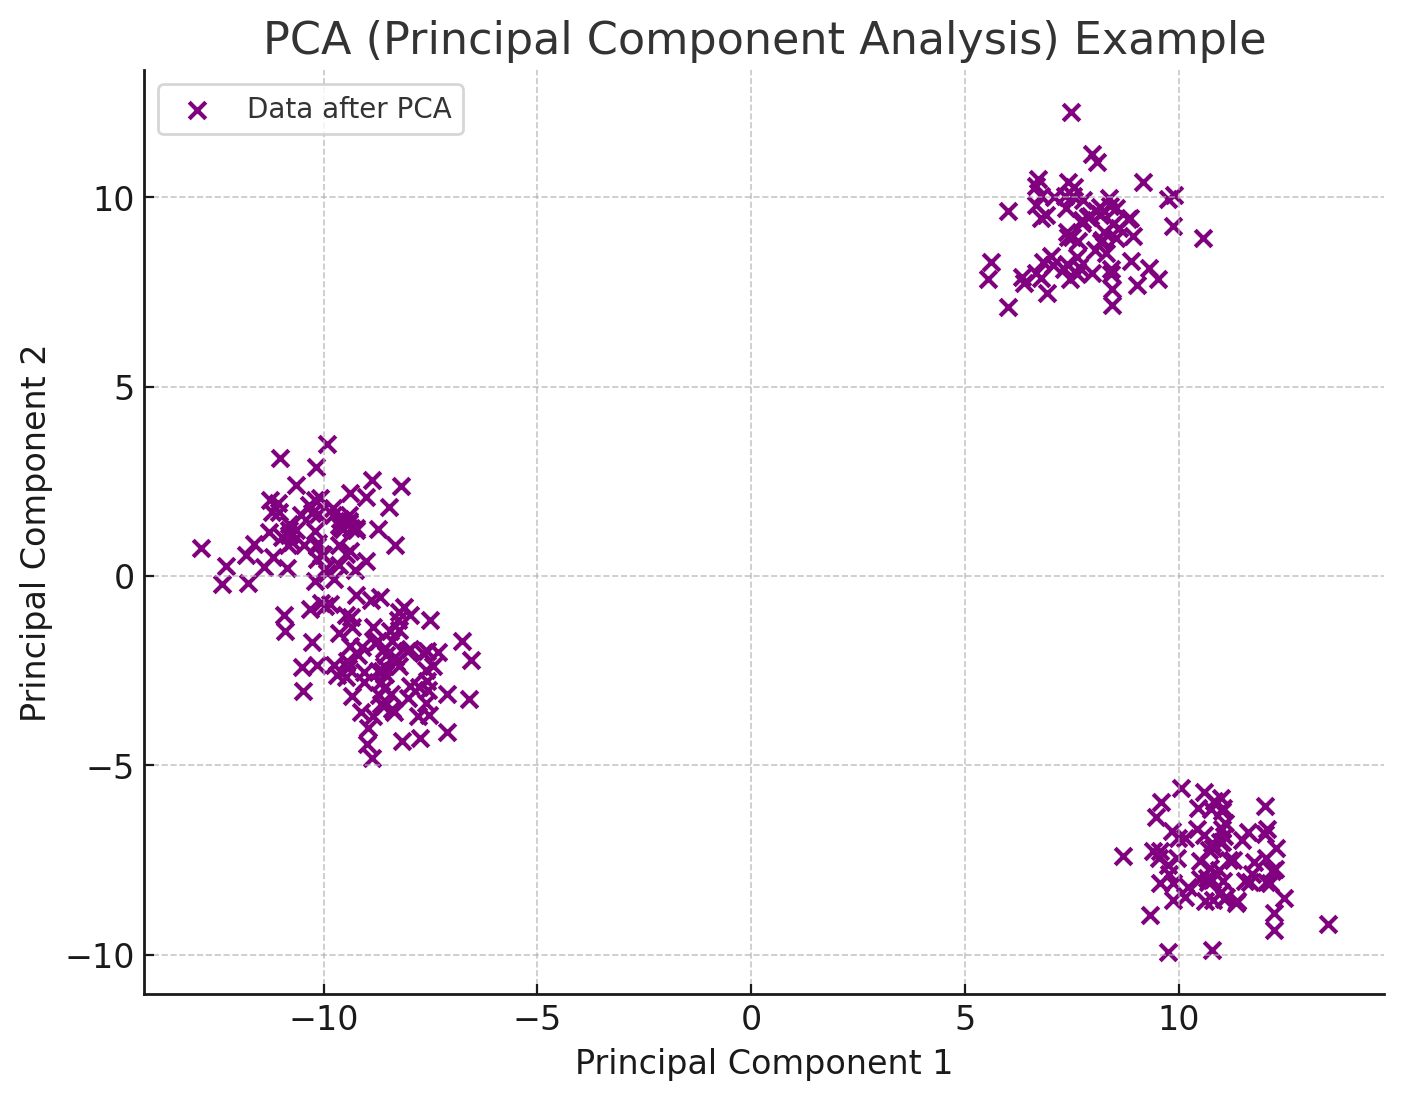

### Using PCA for Genre Clustering with the Spotify Dataset

In our PCA project, we will leverage the Spotify dataset to cluster songs into genres based on their audio features. This analysis will demonstrate how PCA can help in reducing dimensionality and extracting relevant information, making it a valuable tool for music-related tasks.

## Implementation

First, let's reload the Spotify dataset and preprocess it for PCA:

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load and prepare the Spotify dataset
spotify_df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
spotify_df.head(5)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


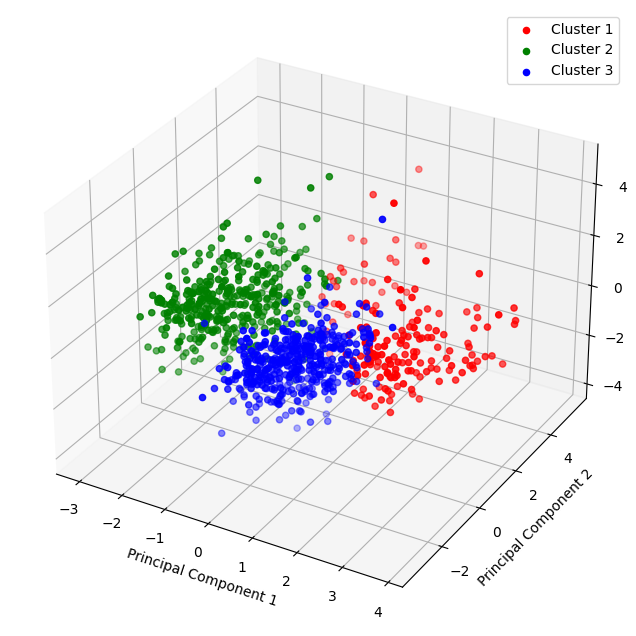

In [15]:
# One-hot encode the 'key' and 'mode' features
spotify_df = pd.get_dummies(spotify_df, columns=['key', 'mode'])
# Selecting relevant numeric features for the recommendation
features = [
    'bpm',
    'danceability_%',
    'valence_%',
    'energy_%',
    'acousticness_%',
    'instrumentalness_%',
    'liveness_%',
    'speechiness_%'
] + [col for col in spotify_df.columns if 'key_' in col or 'mode_' in col]
spotify_data = spotify_df[features]

# Standardize the features
scaler = StandardScaler()
spotify_data_standardized = scaler.fit_transform(spotify_data)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(spotify_data_standardized)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
principal_components = pca.fit_transform(spotify_data_standardized)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign a color to each cluster
colors = ['r', 'g', 'b']
for i in range(3):
    ax.scatter(principal_components[clusters == i, 0], principal_components[clusters == i, 1], principal_components[clusters == i, 2], color=colors[i], label=f'Cluster {i+1}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


## Conclusion

In this notebook, we successfully applied **Principal Component Analysis (PCA)** to the Spotify dataset for song clustering. Our aim was to create clusters of songs based on their audio features, which could assist in curating playlists with a cohesive theme or mood.

### Key Steps and Findings:

1. **Data Preparation:** We concentrated on essential audio features such as 'streams', 'bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', and 'speechiness'.

2. **Feature Standardization:** Standardizing these features ensured each one equally contributed to the analysis, avoiding bias toward variables with higher magnitudes.

3. **K-Means Clustering:** We identified three distinct clusters in the Spotify dataset using K-Means clustering. These clusters represent groups of songs with similar audio characteristics.

4. **PCA for Dimensionality Reduction:** PCA was used to reduce the dimensionality of our data, enabling effective visualization in a 3D scatter plot.

5. **Visualization and Interpretation:** The 3D scatter plot with different colors for each cluster visually represented how songs grouped based on their audio features.

### Implications and Further Exploration:

The clusters identified can be used for creating thematic playlists. Future explorations could incorporate additional variables such as genre or artist popularity to refine clustering. Different numbers of clusters and other clustering algorithms like DBSCAN could be explored for deeper insights.

### Final Thoughts:

Our analysis demonstrates PCA's effectiveness in music data analysis, uncovering hidden patterns and providing valuable insights for music enthusiasts and industry professionals.
